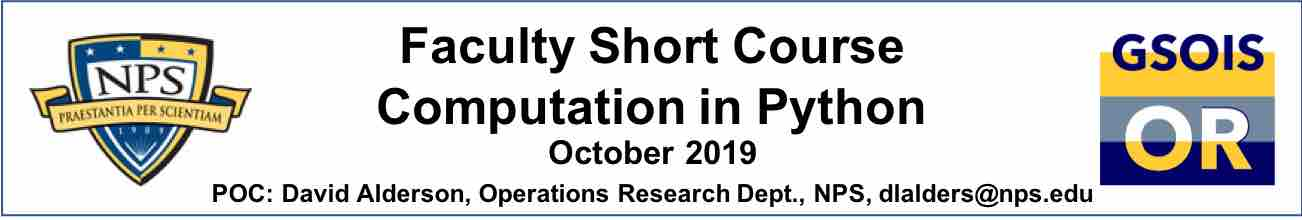

### <center>Lesson 4.1: Pandas, Part 1 (Overview)</center>

# What is pandas?

* As the pandas webpage notes:

```Python has long been great for data munging and preparation, but less so for data analysis and modeling. pandas helps fill this gap, enabling you to carry out your entire data analysis workflow in Python without having to switch to a more domain specific language like R.```


* as noted on Wikipedia:

```[pandas] is derived from the term "panel data", an econometrics term for data sets that include observations over multiple time periods for the same individuals```


<p>pandas is an attempt to bundle together:
<ul>
<li> the convenience of a python dictionary</li>
<li> the computational efficiency of a numpy array</li>
<li> the plotting capability of matplotlib/pyplot</li>
<li> all wrapped within the construct of a spreadsheet/worksheet-like table</li>
</ul>
<p>In order to use pandas effectively, you need to be able to:
<ul>
<li> know how to import data into pandas objects</li>
<li> know how to manipulate these objects (slicing, dicing, and transforming) </li>
<li> perform calculations on this data</li>
<li> present results </li>
</ul>
<p>Becoming proficient at this requires (a lot of) practice.
Here, we focus on some of the basics, and where else to go for self-study.</p>

## Pandas has two main objects
- ``Series``: Like a list, but each entry has a label called an index
  * <a href="http://pandas.pydata.org/pandas-docs/dev/dsintro.html#series">Series</a>

- ``DataFrame``: Can be thought of as a dictionary of Series objects. Also ike a matrix or list of lists, where columns are Series objects and series objects share a common index (like a row).
  * <a  href="http://pandas.pydata.org/pandas-docs/dev/dsintro.html#dataframe">DataFrame</a> 

- both of these are built on top of <a href="http://www.numpy.org/">numpy</a> (this means it's fast!)

### What are the defining attributes of a Series object?
-  Values: The data in the series.
-  (Row) Index: Gives a label to each value in the series.
### What are the defining attributes of a DataFrame object?
-  Values: The data in the series.
-  Row Index: The labels for each 'row'
-  Column Index: The labels for each 'column' (really a Series object)

<center><img src="images/pandas_data_types.png"></center>

### The primary data structure is the ``DataFrame``

* A DataFrame represents a **tabular** [i.e., two-dimensional], spreadsheet-like data structure containing an **ordered** collection of columns, each of which can be a **different [data] type** (numeric, string, boolean, etc.).  (McKinney pp. 111)


* Dataframes are important because:
    * The dataframe data structure in Python is ideal for File I/O involving spreadsheet data (.csv), which is prevalent in the DoD (and in your coursework here)
    * The dataframe data structure provides some improved data slicing capabilities that are useful for many data processing/computation tasks
    * There are A LOT of useful features for data analysis
    * If you are modeling in Python, you will be using Pandas dataframes to organize your data

### Resources for learning pandas

* Pandas Home Page: https://pandas.pydata.org/


* "10 Minutes to Pandas": http://pandas.pydata.org/pandas-docs/stable/10min.html 


* Pandas Online Documentation: http://pandas.pydata.org/pandas-docs/stable/


* A huge portion of the Pandas Online documentation, but in Jupyter notebooks that you can interact with:
https://github.com/gardnmi/Pandas-Tutorials/find/master


* Official PDF Reference (2200+ pages!): http://pandas.pydata.org/pandas-docs/stable/pandas.pdf 


* Pandas Cheat Sheet: https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf 


* A simple suite of exercises to practice pandas on some data sets:
https://github.com/guipsamora/pandas_exercises


* This notebook is adapted from the most excellent tutorial by Greg Reda 
  * http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Series</h2>

<p>A Series is a one-dimensional object similar to an array, list, or column in a table. It will assign a labeled index to each item in the Series. By default, each item will receive an index label from 0 to N, where N is the length of the Series minus one.</p>

### Let's make a series and take a look at it.

In [ ]:
# create a Series with an arbitrary list of data

data=[7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!']

s = pd.Series(data)

s

### Let's check out the main attributes

In [ ]:
#default index is a RangeIndex
s.index 

In [ ]:
type(s.index)

In [ ]:
#What are the values
s.values
#What is the type? Notice it's a numpy array!

### In many cases, the key to working in pandas is getting the index set up...

In [ ]:
#Let's create our own index that isn't the default index. Can access and change this attribute just like any object.
new_index=[ 'row_%d' % i  for i in range(1,s.values.shape[0]+1)]
new_index

In [ ]:
s.index=new_index
s

In [ ]:
#Can also do this at initialization
s=pd.Series(data,index=new_index)
s

In [ ]:
type(s.index)

## Selection and slicing:
-  Numpy-like indexing sometimes works, but not consistent.
-  Will eventually give you a bug and confuse you when we get to dataframes.

## Better practice to use the provided functions:
-  ``series.loc[arg]`` --> Access values by index (loc=location)
-  ``series.iloc[arg]`` --> Access values by position (iloc=integer location)

## What's the difference?
- ``series.loc[arg]`` works with the labels. Why does this make sense with Pandas?
- ``series.iloc[arg]`` works like numpy indexing. 

In [ ]:
s

In [ ]:
s.loc['row_2']

In [ ]:
s.iloc[1]

In [ ]:
s.iloc[1:3]  # slicing with integer location works like numpy would

In [ ]:
s.loc['row_2':'row_4']  # slicing with labels includes the end point (different!)

In [ ]:
s.iloc[[1,3]]  # fancy indexing, like in a ndarray (here, show items ar row 1 and 3)

###  Pandas supports direct access via ``s[ ]`` but it can get confusing...
because it tries to support both ``.iloc[ ]`` and ``.loc[ ]`` behavior, and sometimes these are in conflict

In [ ]:
s

In [ ]:
s[1]  # same as s.iloc[1]

In [ ]:
s[1:3]  # same as s.iloc[1:3]

In [ ]:
s['row_2':'row_4']

In [ ]:
s[-1]  # here, same as s.iloc[-1]

### The use of ``s[ ]`` is particularly problematic if the labels in the index look like integers (the default index values)!

In [ ]:
#Let's create a series with integer index to illustrate the issue
data=[7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!']

s = pd.Series(data)

s

In [ ]:
s.iloc[1:3] #is like numpy slicing

In [ ]:
s.loc[1:3] #is NOT like numpy slicing 
# (it is treating the numbers as the names of indices, NOT integer locations)

In [ ]:
s[1:3] #is treating this like s.iloc[]

In [ ]:
s.iloc[-1] # note this works

In [ ]:
s.loc[-1] # and this does not

In [ ]:
s[-1] # treat this like s.loc[-1] which does NOT work!
#Does not work! Why!? 
# It sees integer indices, so uses loc to search for index=-1. Does not exist. Throws error.

### Pro Tip: Avoid direct access via ``[ ]``, and use the provided functions:
-  ``series.loc[arg]`` --> Access values by index (loc=location)
-  ``series.iloc[arg]`` --> Access values by position (iloc=integer location)

## Let's make another series and manipulate it. 
<p>The Series constructor can convert a dictonary as well, using the keys of the dictionary as its index.</p>

In [ ]:
data = {'Chicago': 1000, 'New York': 1300, 'Portland': 900, 'San Francisco': 1100,
     'Austin': 450, 'Boston': None}
data

In [ ]:
cities = pd.Series(data)
cities

<p>You can use the index to select specific items from the Series ...</p>

In [ ]:
cities.loc['Chicago']

In [ ]:
cities.loc[['Chicago', 'Portland', 'San Francisco']]

<p>Or you can use boolean indexing (i.e., masking) for selection.</p>

In [ ]:
cities.loc[cities < 1000]

<p>That last one might be a little weird, so let's make it more clear - <code>cities &lt; 1000</code> returns a Series of True/False values, which we then pass to our Series <code>cities</code>, returning the corresponding True items.</p>

In [ ]:
less_than_1000 = cities < 1000
less_than_1000

In [ ]:
cities.loc[less_than_1000]  # just like we saw with numpy

<p>You can also change the values in a Series on the fly.</p>

In [ ]:
# changing based on the index
print('old value:')
print(cities.loc['Chicago'])
cities.loc['Chicago'] = 1400
print('new value:')
print(cities.loc['Chicago'])

In [ ]:
cities

In [ ]:
# changing values using boolean logic #WILL NOT WORK WITH iloc
print(cities.loc[cities < 1000])
cities.loc[cities < 1000] = 750
print(cities.loc[cities < 1000])

<p>Of course, we are changing these values in the original Series.</p>

In [ ]:
cities

<p>What if you aren't sure whether an item is in the Series? You can check using idiomatic Python.</p>

In [ ]:
print('Seattle' in cities)
print('Seattle' in cities.index)
print(750 in cities)
print(750 in cities.values)

In [ ]:
'San Francisco' in cities

<p>Thus, one way to think about a Series is as a fixed-length, ordered dict because it is a mapping of index values to data values.  It has been designed so that it can be substituted into many functions that expect a dict.  But it also has much of the functionality of a NumPy array.</p>

<p>For example, mathematical operations can be done using scalars and functions.</p>

In [ ]:
# divide city values by 3
cities / 3

In [ ]:
# square city values
np.square(cities)

<p>Note that the previous two operations are returning new Series objects, not changing the original one.</p>

In [ ]:
cities

<p>You can add two Series together, which returns a union of the two Series with the addition occurring on the shared index values. Values on either Series that did not have a shared index will produce a NULL/NaN (not a number).</p>

In [ ]:
s1 = cities.loc[['Chicago', 'New York', 'Portland']]
s1

In [ ]:
s2 = cities.loc[['Austin', 'New York']]
s2

In [ ]:
s1 + s2

<p>Notice that because Austin, Chicago, and Portland were not found in both Series, they were returned with NULL/NaN values.</p>

In [ ]:
# observe that s1 is its own Series object, even though it was created from cities...
s1.loc['Chicago'] = 2000
s1

In [ ]:
cities

<p>NULL checking can be performed with <code>isnull</code> and <code>notnull</code>.</p>

In [ ]:
# returns a boolean series indicating which values aren't NULL
cities.notnull()

In [ ]:
# use boolean logic to grab the NULL cities
cities.isnull()

In [ ]:
cities[cities.isnull()]

### Pandas has been designed to make it easy to manipulate, analyze, and visualize data

In [ ]:
# McKinney p.230
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))

In [ ]:
s

In [ ]:
s.plot()  # note: we are essentially calling a matplotlib plot function on the Series

In [ ]:
# McKinney p.237
comp1 = np.random.normal(0,1,size=200)  # an ndarray of N(0,1) values
comp1

In [ ]:
values1 = pd.Series(comp1)  # a pandas Series object from the ndarray
values1

In [ ]:
values1.hist(bins=100,alpha=0.3, color='k', density=True)  # some voodoo magic

In [ ]:
comp2 = np.random.normal(10,2,size=200)  # ndarray of N(10,4) values
values2 = pd.Series(comp2)
values2.hist(bins=100,alpha=0.3, color='b', density=True)

In [ ]:
both_values = pd.Series(np.concatenate([comp1,comp2]))
both_values.hist(bins=100,alpha=0.3, color='k', density=True)
both_values.plot(kind='kde',style='b--')  # kernel density estimate (kde)

<p>Whoa.  Okay, so the syntax of last two steps probably didn't make complete sense (yet).
But, hopefully you can (1) follow basically what happened, and (2) see the potential power of this.</p>

# DataFrame
<p>A DataFrame is a tablular data structure comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. </p>
<p>Each column of a DataFrame can be a different value type (numeric, string, boolean, etc.).</p>
<p>The DataFrame has an index for labeling rows and column names.  You can also think of a DataFrame as a group (really a dict) of Series objects that share an index (the row names).</p>
<p>For the most part, folks primarily work with DataFrames.</p>

<p>The following examples are taken from McKinney ("Python for Data Analysis," 2013) pp.108-115.</p>

In [ ]:
data = {'state':['Ohio','Ohio','Ohio','Nevada','Nevada'],
       'year':[2000,2001,2002,2001,2002],
       'pop':[1.5,1.7,3.6,2.4,2.9]}
data

<p>The resulting DataFrame will have its index assigned automatically as with Series, and the columns are place in sorted order.</p>

In [ ]:
frame = pd.DataFrame(data)
frame

<p>If you specify a sequence of columns, the DataFrame's columns will be exactly what you pass:</p>

In [ ]:
pd.DataFrame(data,columns=['year','state','pop'])

<p>As with Series, if you pass a column that isn't contained in <code>data</code>, it will appear with NA values in the result:</p>

In [ ]:
frame2 = pd.DataFrame(data,columns=['year','state','pop','debt'],
                     index=['one','two','three','four','five'])
frame2

## Let's take a look at the main attributes

In [ ]:
frame2.index

In [ ]:
frame2.columns

In [ ]:
frame2.values

In [ ]:
frame2.head(2)

In [ ]:
frame2.tail(2)

<p>A column in a DataFrame can be retrieved as a Series either by dict-like notation or by attribute:</p>

In [ ]:
frame2['state']  # note this is getting a COLUMN!

In [ ]:
frame2.year      # object oriented notation is supported too

<p>Note that when we ask for a single column of a DataFrame, what we get is a Series object.</p>

In [ ]:
type(frame2.year)

In [ ]:
frame2.year.name

## Selection and slicing:
-  In general, indexing with .loc and .iloc is the most consistent way to access values, rows, or columns. 
-  Also, it is consistent with the way you work with indexing Series objects.
-  For accessing scalars, there is an optimize .at and .iat operation, but for us .loc and .iloc are fine
-  More info about .at and .iat https://pandas.pydata.org/pandas-docs/stable/indexing.html#fast-scalar-value-getting-and-setting

```python
frame.loc[row_name,column_name] #normal
frame.loc[list_of_row_names,list_of_column_names] #lists of arguments
frame.loc[some_row_name:other_row_name,some_column_name:other_column_name] #slicing works as well

frame.iloc[row_number,column_number] #normal
frame.iloc[list_of_row_numbers,list_of_column_numbers] #lists of arguments
frame.iloc[some_row_num:other_row_num,some_column_num:other_column_num] #slicing works as well
```

In [ ]:
frame2 #Let's review our dataframe

#### Get a single value

In [ ]:
frame2.loc['one','year']

In [ ]:
frame2.iloc[0,0]  #equivalent

#### Get multiple values

In [ ]:
frame2.loc[ ['one','three'],['state','pop'] ]

In [ ]:
frame2.iloc[ [0,2],[1,2] ]  #equivalent

#### Do some slicing

In [ ]:
frame2.loc['two':'four','state':'debt']

In [ ]:
frame2.iloc[ 1:4 , 1:]  #equivalent

#### Get a single column (series)

In [ ]:
frame2['pop']

In [ ]:
frame2.loc[:,'pop']

In [ ]:
frame2.iloc[:,2]

#### Get a single row (Returned as series)

In [ ]:
frame2.loc['one',:] 

In [ ]:
frame2.iloc[0,:]

In [ ]:
frame2['state'][:3]  # can mix these

##  Let's modify the dataframe.
<p>Columns can be modified by assignment.  For example, the empty 'debt' column could be assigned a scalar value or an array of values.</p> 

In [ ]:
frame2

In [ ]:
frame2['debt'] = 16.5  # this sets all of the values in column 'debt' to 16.5
frame2

In [ ]:
frame2['debt'] = np.arange(5.0)  # assigns individual values (in order) to the range values
frame2

<p>When assigning lists or arrays to a column, the value's length must match the length of the DataFrame.</p>
<p>Alternatively, if you assign a Series, it will be instead confirmed exactly to the DataFrame's index, inserting missing values in any index.</p>

In [ ]:
val = pd.Series([-1.2,-1.5,-1.7],index=['two','four','five']) 
val

In [ ]:
frame2['debt'] = val
frame2

<p>Assigning a column that doesn't exist will create a new column.  The <code>del</code> keyword will delete columns as with a dict:</p>

In [ ]:
frame2['eastern'] = None
frame2

In [ ]:
frame2.debt.notnull()

In [ ]:
frame2.eastern.notnull()

In [ ]:
frame2['eastern'] = frame2.state == 'Ohio'    # what do you think this does?
frame2

In [ ]:
del frame2['eastern']
frame2

## Other ways to create DataFrames
-  Another common form of data is a nested dict of dicts format
-  Also easy to make from csv
-  Many other ways: https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe

### From dict of dicts

In [ ]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9}, 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
pop

<p>If passed to DataFrame, it will interpret the outer keys as the columns and the inner keys as the row indices:</>

In [ ]:
frame3 = pd.DataFrame(pop)
frame3

<p>Transposing any DataFrame is easy.</p>

In [ ]:
frame3.T

<p>Within the DataFrame object, the <code>index</code> and <code>columns</code> attributes each have their own attribute, called <code>name</code>, that if set, will be displayed:</p>

In [ ]:
frame3.index.name = 'year'
frame3.columns.name = 'state'
frame3

### From csv (no more reading line by line with open files!)

In [ ]:
frame=pd.read_csv('ChicagoHomicides.csv')
frame.head()

## FYI: Can use pyplot with DataFrames as well...

In [ ]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0), 
                  columns=['A','B','C','D'], 
                  index=np.arange(0,100,10))
df

In [ ]:
df.plot()

In [ ]:
df.T.plot()

In [ ]:
# McKinney p.233
df2 = pd.DataFrame(np.random.rand(6,4),
                 index=['one','two','three','four','five','six'],
                 columns=pd.Index(['A','B','C','D'], name='Genus'))
df2

In [ ]:
df2.plot(kind='bar')

## Lots more to learn here.  It's going to take practice...